<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [217]:
# YOUR CODE HERE
import pandas as pd

past = pd.read_csv('../dat/past.csv.gz')
past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [218]:
past.sample(20)

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
2390,5793706,5.989450e+08,3.000000,2.000000,2.204688e+06,3.020000,3.020000,1.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
2271,5771389,5.174200e+08,1.000000,1.000000,0.000000e+00,21.608889,21.608889,0.000000,1.000000,0.000000,...,0.000000,0.111111,0.000000,0.444444,0.222222,0.111111,0.000000,1,0.111111,1.000000
4225,5857967,5.669009e+08,3.000000,1.000000,2.911250e+03,6.440000,6.440000,0.750000,1.500000,0.500000,...,0.250000,0.500000,0.000000,0.000000,0.000000,0.250000,0.250000,0,0.000000,1.000000
2261,5838139,1.967889e+08,1.000000,1.000000,0.000000e+00,3.490000,3.490000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0,0.000000,1.000000
1244,5725679,5.446768e+08,1.750000,1.375000,9.877550e+04,0.480000,0.480000,0.750000,0.250000,0.375000,...,0.125000,0.000000,0.000000,0.125000,0.375000,0.250000,0.125000,1,0.125000,1.375000
4111,5700029,5.028720e+08,2.714286,1.285714,1.533871e+04,0.392857,0.392857,1.285714,0.000000,1.000000,...,0.142857,0.000000,0.000000,0.285714,0.285714,0.285714,0.142857,1,0.000000,1.000000
741,5741040,5.940537e+08,1.000000,1.000000,0.000000e+00,4.760000,4.760000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0,0.000000,1.000000
3607,5816156,5.617559e+08,1.333333,1.000000,2.600000e+01,3.950000,3.950000,0.333333,0.666667,0.333333,...,0.000000,0.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0,0.000000,1.000000
2240,5837852,4.360954e+08,1.000000,1.000000,0.000000e+00,3.490000,3.490000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000
2131,5772455,5.237111e+08,3.000000,1.500000,7.602742e+05,4.760000,4.642500,1.250000,0.750000,1.000000,...,0.250000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0,0.000000,0.750000


In [219]:
len(past['user_id'].unique())

4981

In [220]:
# YOUR CODE HERE

perct_purchased = past[past['Purchased?']==1]['Purchased?'].count()/past.shape[0]

#No, some user don't look at product but still buy it
past[(past['Purchased?']==1) & (past['NumView']==0)]['user_id'].count()
#Here are the users who do window shopping and not buy anything
past[(past['Purchased?']==0) & (past['NumView']>0)]['user_id'].count()

#I don't think data is balanced. Depending on user purchasing behavior the # of user for each category are distributed properly like there are 25 users who bought the product without looking vs other users are higher in number.


2723

3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [221]:
# YOUR CODE HERE
X = past.drop(['product_id', 'user_id'], axis = 1)
# YOUR CODE HERE
y = X.pop('Purchased?')

In [222]:
X.sample(5)

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Nov,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Category
3861,3.00,1.0,24363.500000,7.025000,7.025000,0.500000,0.500000,2.000000,179.000000,10.000000,...,0.000000,0.500000,0.000000,0.00,0.0,0.500000,0.50,0.00,0.0,1.00
3906,4.25,3.0,764014.750000,6.330000,6.330000,1.250000,1.250000,1.750000,31.250000,33.750000,...,0.250000,0.000000,0.000000,0.25,0.0,0.250000,0.25,0.25,0.0,0.75
1903,2.00,1.0,5.000000,6.670000,6.670000,0.000000,1.000000,1.000000,0.000000,17.000000,...,1.000000,0.000000,0.000000,0.00,0.0,0.000000,1.00,0.00,0.0,1.00
3119,4.00,1.0,3129.000000,1.100000,1.100000,1.000000,2.000000,1.000000,7.000000,134.000000,...,0.000000,0.000000,0.000000,0.00,0.0,1.000000,0.00,0.00,0.0,1.00
547,1.50,1.0,24804.833333,5.493333,5.493333,0.666667,0.333333,0.333333,86.666667,30.333333,...,0.166667,0.166667,0.166667,0.00,0.0,0.333333,0.50,0.00,0.0,1.00


In [223]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [224]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #.set_output(transform="pandas")
scaled_X = scaler.fit_transform(X)

scaled_pca = PCA(n_components=5).fit(scaled_X)
X_reduced = scaled_pca.transform(scaled_X)

In [225]:
X_reduced.shape

(5000, 5)

In [226]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [227]:
# YOUR CODE HERE
scaled_pca.explained_variance_ratio_

array([0.10282167, 0.09445925, 0.06516072, 0.05135814, 0.04267213])

6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [228]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [229]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

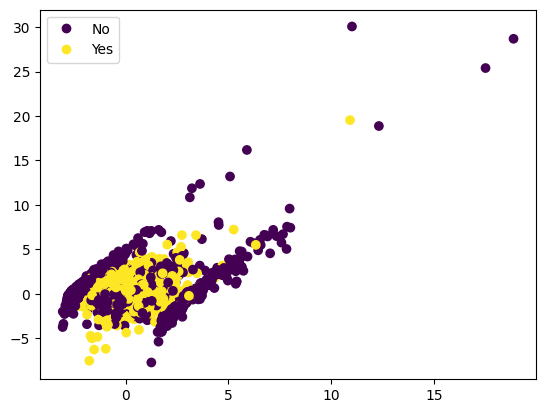

In [230]:
visualize_2pcs(X_reduced, y)

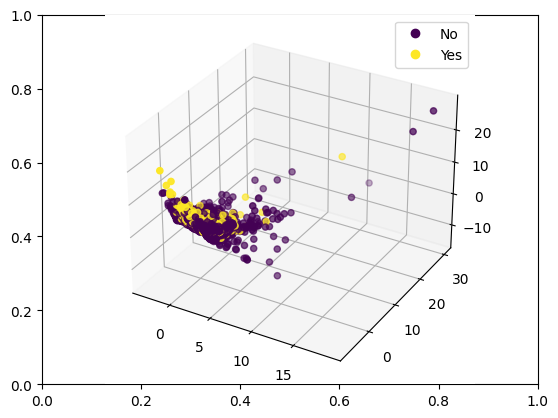

In [231]:
visualize_3pcs(X_reduced, y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [232]:
# YOUR CODE HERE (imports!)
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

def train(features, target, standardize = False):
    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)
    steps = []
    if standardize:
        steps.append(('standardize', StandardScaler()))
        #scaler = preprocessing.StandardScaler().fit(X_train)
        #pipe = make_pipeline(StandardScaler(), LogisticRegression())
    steps.append(('logistic_regression', LogisticRegression()))
    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    #lr = LogisticRegression(random_state=0).fit(X_train, y_train) #class_weight = 'balanced'
    #pipe.fit(X_train, y_train)
    print(classification_report(y_test, y_pred))
    

Now apply the pipeline on the all the features `X` and review the performance

In [233]:
train(X, y)

              precision    recall  f1-score   support

           0       0.65      0.99      0.78       649
           1       0.11      0.00      0.01       351

    accuracy                           0.64      1000
   macro avg       0.38      0.50      0.39      1000
weighted avg       0.46      0.64      0.51      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

I don't think it is needed for this data because I don't see much difference in output.

In [234]:
train(X_reduced, y, True)

              precision    recall  f1-score   support

           0       0.64      0.96      0.77       649
           1       0.04      0.00      0.01       351

    accuracy                           0.62      1000
   macro avg       0.34      0.48      0.39      1000
weighted avg       0.43      0.62      0.50      1000



In [235]:
train(X_reduced, y)

              precision    recall  f1-score   support

           0       0.64      0.96      0.77       649
           1       0.04      0.00      0.01       351

    accuracy                           0.62      1000
   macro avg       0.34      0.48      0.39      1000
weighted avg       0.43      0.62      0.50      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*

    
    No, I was hoping f1-score for reduced set to be higher but it is lower than the regular data set.
    Pros of using reduced set of feature would be easy to conduct or track downstream changes, lower number of dimensions makes it less complicated.
    Cons of using reduced set is there will be one more step to reiterate and figure out the right # of combination that can help us with our prediction.

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [236]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [237]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        # YOUR CODE HERE
        kmeans = KMeans(k, random_state = 10)
        kmeans.fit(X)
        # YOUR CODE HERE
        inertias.append(kmeans.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

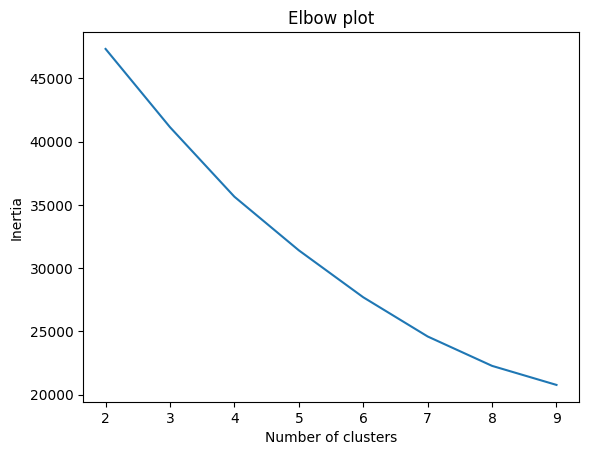

In [238]:
k = range(2, 10)
visualize_elbow(X_reduced, k)

4. What are the disadvantage to use the Elbow method? 

    *YOUR ANSWER HERE*

While the elbow method is a simple and widely used heuristic for choosing the optimal number of clusters in k-means clustering, there are some limitations and disadvantages to this approach:

- Subjectivity: The choice of the "elbow" in the plot can be subjective and depend on the user's interpretation. There may not be a clear elbow in some cases, or multiple elbows may be present, making it difficult to determine the optimal number of clusters.

- Sensitivity to data and initialization: The elbow method is sensitive to the choice of data and the initialization of the clustering algorithm. The elbow may shift or disappear altogether if the data is transformed or if different initialization methods are used.

- Doesn't account for complex data structures: The elbow method assumes that the data has a simple and well-defined structure that can be accurately represented by a fixed number of clusters. However, in practice, the data may have more complex and non-linear structures that cannot be captured by k-means clustering.

- Only works with k-means clustering: The elbow method is specific to k-means clustering and may not be applicable to other clustering algorithms that do not have an analogous measure of inertia or sum of squared distances.

- Lack of statistical validity: The elbow method does not have a formal statistical basis, and there is no guarantee that the chosen number of clusters is optimal or statistically significant.

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [239]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.2526100027393005
For n_clusters = 3 The average silhouette_score is : 0.2839893243329685
For n_clusters = 4 The average silhouette_score is : 0.27472250436137685
For n_clusters = 5 The average silhouette_score is : 0.27985457785867696
For n_clusters = 6 The average silhouette_score is : 0.24595537497883496
For n_clusters = 7 The average silhouette_score is : 0.2531605113532036
For n_clusters = 8 The average silhouette_score is : 0.2633532941152097


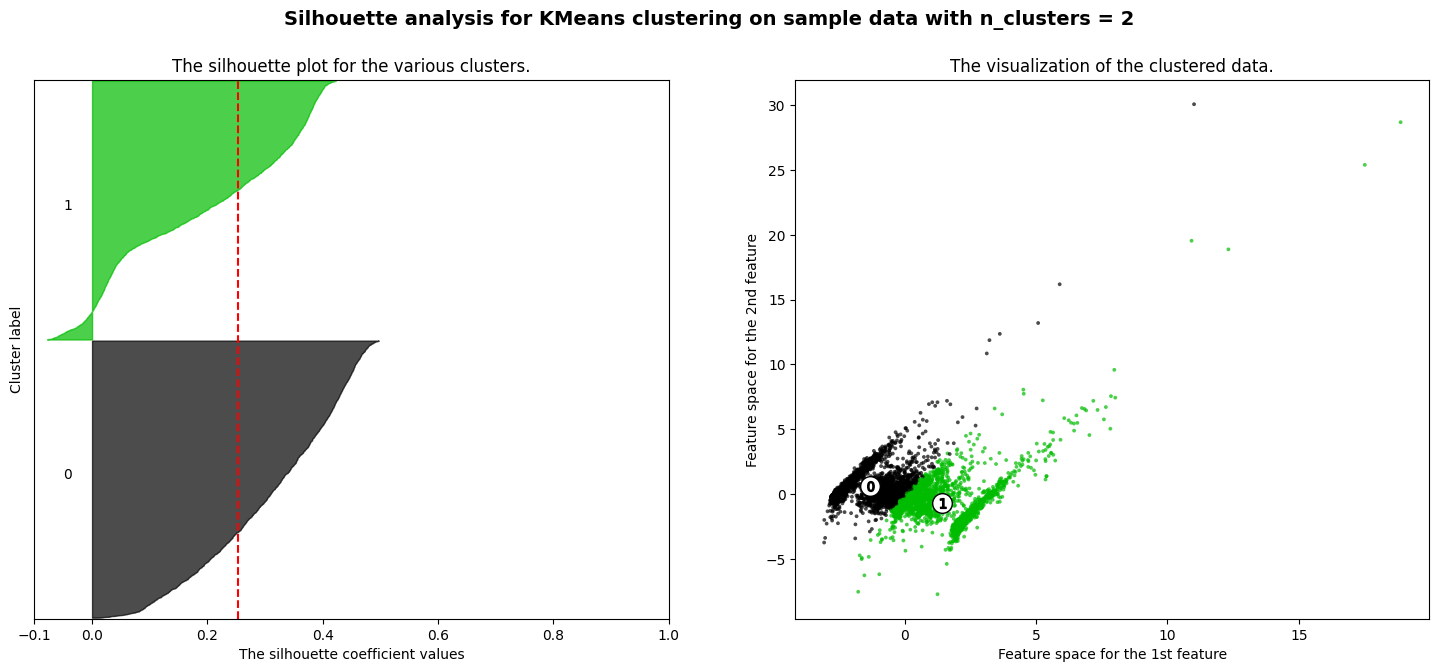

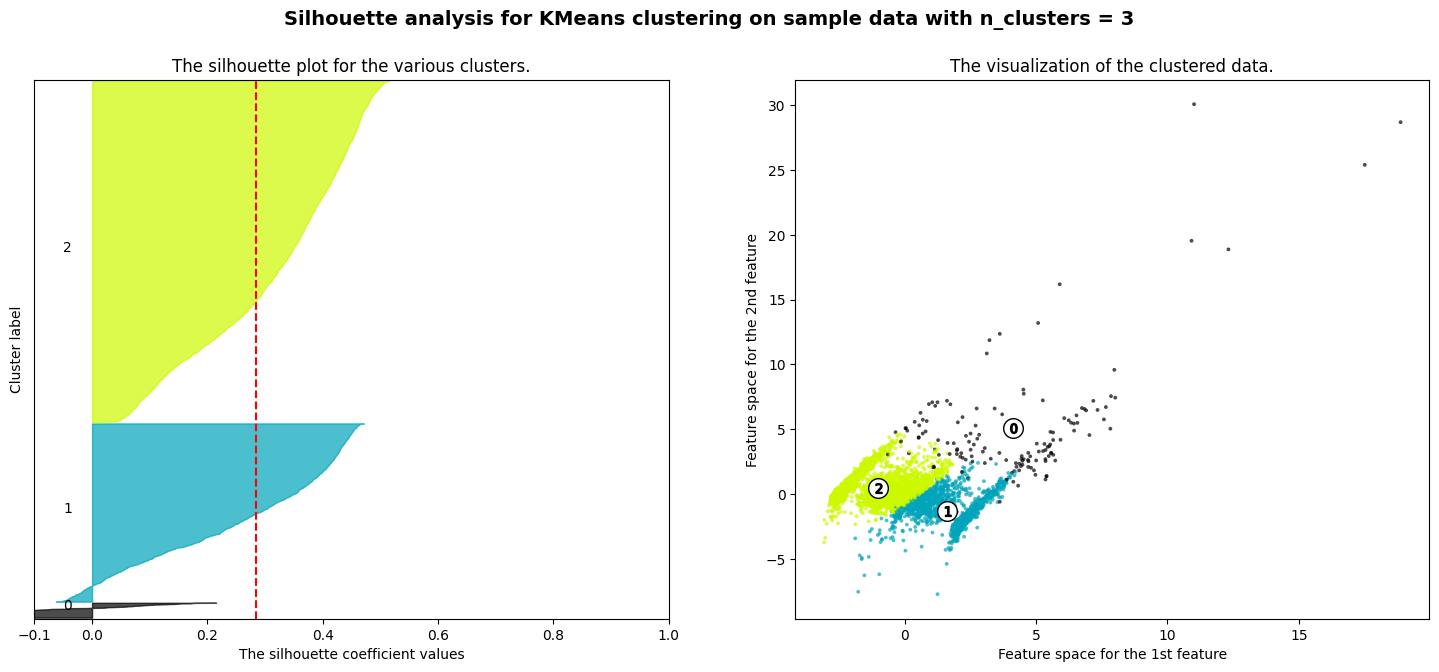

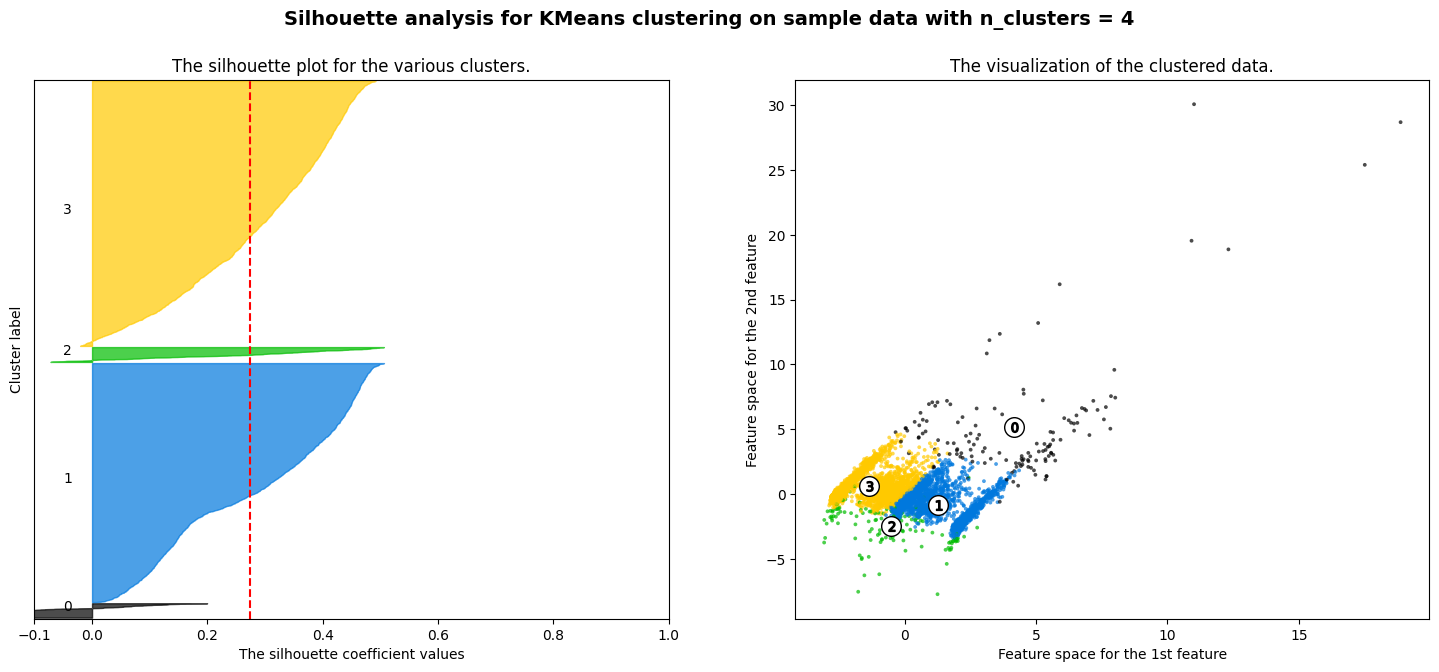

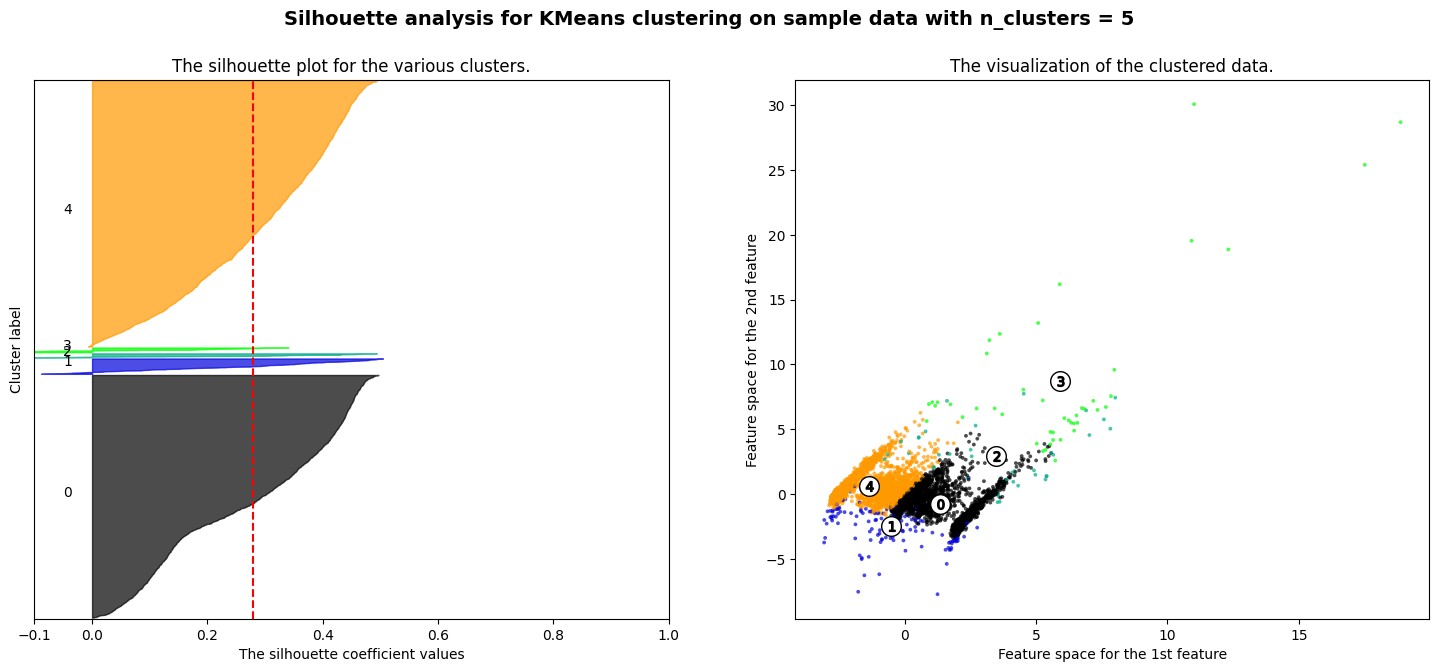

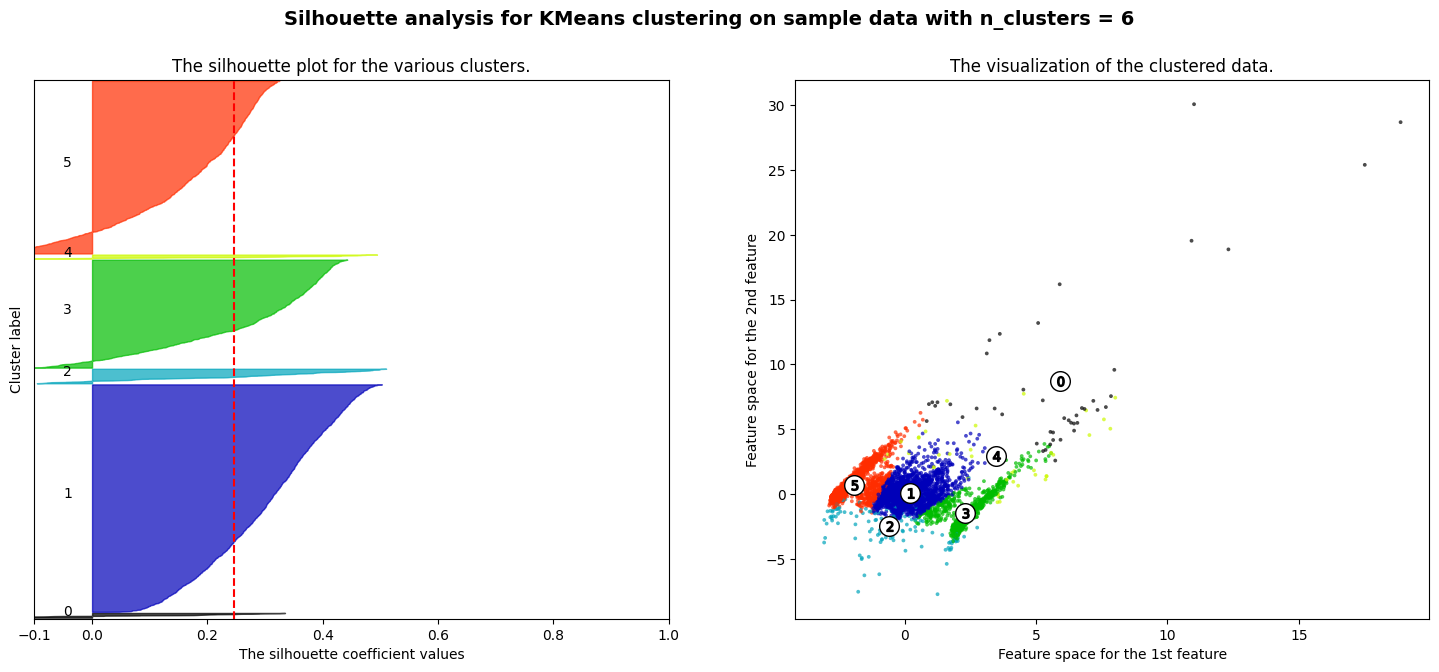

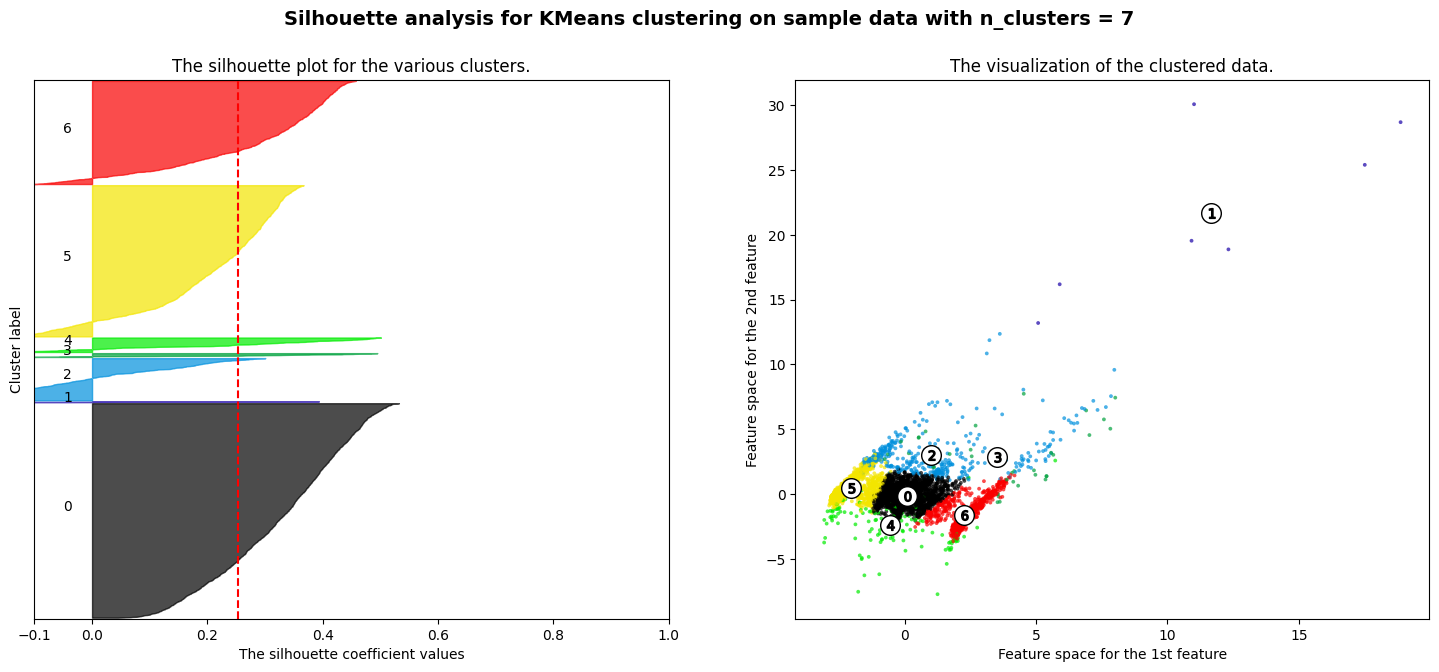

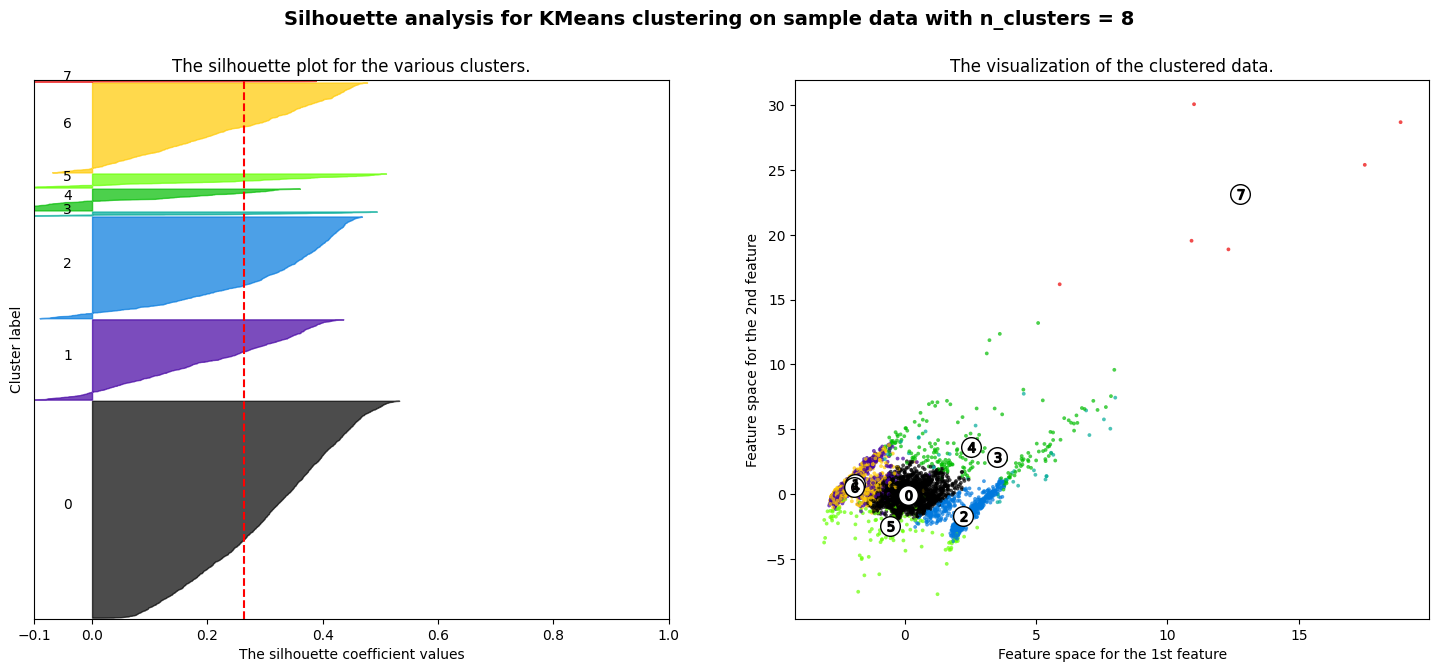

In [240]:
visualize_silhouette(8, X_reduced)

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [241]:
n_cluster = 4
km = KMeans(n_cluster, random_state = 10)
km.fit(X_reduced)

KMeans(n_clusters=4, random_state=10)

7. What is the size of each cluster? 

In [242]:
# YOUR CODE HERE
cluster = km.labels_

cluster_sizes = []
for i in range(n_cluster):
    cluster_sizes.append(len(X_reduced[cluster==i]))

print(cluster_sizes)

[136, 2240, 140, 2484]


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [243]:
# YOUR CODE HERE
#past = pd.DataFrame()
#past['cluster_pca'] = km.predict(X_reduced)
past['cluster_pca'] = km.labels_

In [244]:
past

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,cluster_pca
0,5866936,5.618978e+08,1.333333,1.333333,5550.000000,15.840000,15.840000,0.000000,1.333333,0.000000,...,0.000000,0.000000,0.666667,0.333333,0.000000,0.000000,0,0.000000,1.000000,1
1,5647110,5.326529e+08,2.250000,1.500000,27556.500000,5.800000,5.565000,1.250000,0.250000,0.250000,...,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0,0.000000,1.000000,1
2,5790472,4.578109e+08,1.000000,1.000000,0.000000,6.272500,6.272500,0.250000,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0,0.000000,1.000000,1
3,5811598,4.612641e+08,1.500000,1.500000,131532.500000,5.560000,5.560000,0.250000,1.000000,0.250000,...,0.000000,0.000000,0.000000,0.500000,0.000000,0.250000,0,0.250000,1.000000,1
4,5846363,5.157993e+08,1.875000,1.375000,11055.875000,4.086250,4.086250,0.500000,1.000000,0.250000,...,0.375000,0.000000,0.125000,0.250000,0.250000,0.000000,1,0.000000,1.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5610082,5.853313e+08,1.500000,1.000000,77.000000,0.790000,0.790000,0.500000,0.500000,0.000000,...,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0,0.000000,1.000000,1
4996,5770265,5.124349e+08,1.954545,1.363636,348649.090909,2.972727,2.972727,0.636364,0.681818,0.590909,...,0.136364,0.045455,0.181818,0.409091,0.045455,0.090909,1,0.090909,1.045455,3
4997,5923106,4.427739e+08,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000,1
4998,5889691,6.104029e+08,2.000000,1.000000,766.000000,8.250000,8.250000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000,1


9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

In [246]:
pd.set_option("display.max_columns",None)
past.groupby(['cluster_pca']).describe()

product_id                                                   \
                 count          mean           std      min         25%   
cluster_pca                                                               
0                136.0  5.795887e+06  4.976325e+05  89190.0  5803805.75   
1               2240.0  5.598523e+06  1.124092e+06   4185.0  5770294.00   
2                140.0  5.464865e+06  1.433309e+06   5379.0  5774245.25   
3               2484.0  5.545339e+06  1.202110e+06   4104.0  5749130.50   

                                              user_id                \
                   50%         75%        max   count          mean   
cluster_pca                                                           
0            5850561.0  5890281.00  5931329.0   136.0  5.034278e+08   
1            5839285.5  5884342.00  5932538.0  2240.0  5.332769e+08   
2            5863373.0  5891796.75  5931773.0   140.0  5.348805e+08   
3            5822869.0  5862701.75  5916644.0  2484.0  5.151987e+08   

                                                                    \
                      std          min           25%           50%   
cluster_pca                                                          
0            7.783817e+07  131994138.0  4.686302e+08  5.189655e+08   
1            5.853584e+07  121915612.0  5.077652e+08  5.406010e+08   
2            5.518983e+07  143995345.0  5.165148e+08  5.465098e+08   
3            5.891103e+07   65241811.0  4.939372e+08  5.282805e+08   

                                       NumOfEventsInJourney            \
                      75%          max                count      mean   
cluster_pca                                                             
0            5.494246e+08  610001725.0                136.0  5.696424   
1            5.717772e+08  622026195.0               2240.0  1.829166   
2            5.664950e+08  615128468.0                140.0  1.454884   
3            5.561008e+08  595001304.0               2484.0  1.883925   

                                                          NumSessions  \
                  std  min  25%       50%       75%   max       count   
cluster_pca                                                             
0            5.092737  1.0  3.0  5.000000  6.162281  40.0       136.0   
1            0.797349  1.0  1.0  1.714286  2.200000   5.5      2240.0   
2            0.648431  1.0  1.0  1.300000  1.653195   6.2       140.0   
3            0.852080  1.0  1.0  1.800000  2.285714   7.5      2484.0   

                                                                          \
                 mean       std  min       25%       50%       75%   max   
cluster_pca                                                                
0            3.057517  3.316150  1.0  1.935526  2.000000  3.000000  28.0   
1            1.274872  0.363233  1.0  1.000000  1.166667  1.500000   4.0   
2            1.172917  0.277058  1.0  1.000000  1.033333  1.258929   3.0   
3            1.288050  0.384927  1.0  1.000000  1.166667  1.468421   4.0   

            interactionTime                                               \
                      count          mean           std  min         25%   
cluster_pca                                                                
0                     136.0  2.348657e+06  2.512879e+06  0.0  441089.375   
1                    2240.0  2.064445e+05  4.871914e+05  0.0       0.000   
2                     140.0  9.764037e+04  2.073028e+05  0.0       0.000   
3                    2484.0  1.809961e+05  3.942355e+05  0.0       0.000   

                                                    maxPrice             \
                      50%           75%         max    count       mean   
cluster_pca                                                               
0            1.469692e+06  3.770195e+06  10875369.0    136.0   4.789885   
1            2.409875e+03  1.899774e+05   5608663.0   2240.0   6.357332   
2            4.907500e+02  1.194

    *YOUR ANSWER HERE*
    Cluster 1 & 3 have most number of data. Cluster 2 has expensive products, which has high interactionTime. And, Cluster 0 has high insessionCart & inSessionView & inSessionRemove. But, cluster 2 has high # of purchased products.
    Cluster 0 & 1 had better sales in 2020 than in 2019 where as Cluster 2 & 3 had opposite.

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

    *YOUR ANSWER HERE*
The algorithm makes a few assumptions about the nature of the data and the problem setting, which are as follows:

- K-means assumes that the data points can be represented as vectors in a multi-dimensional space.

- The algorithm assumes that the data points in each cluster are homogeneous and that they are well-separated from the data points in other clusters.

- K-means assumes that the number of clusters, k, is known a priori or can be estimated from the data.

- The algorithm assumes that the clusters are spherical, meaning that they are roughly circular in shape and have the same radius.

- K-means assumes that the variance of the distribution of each variable is the same for all the clusters.

- The algorithm assumes that each data point belongs to only one cluster, i.e., it does not allow for overlapping clusters.

- K-means assumes that the distance metric used to measure the similarity between data points is Euclidean distance.


One of the assumptions is cluster should be similar in size but in our data, 2 clusters are significantly larger than the other two.

11. Jot down recommendations or followup steps, detailing the reasons.

In [ ]:
# YOUR CODE HERE

    *YOUR ANSWER HERE*

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert new.shape == (30091, 5)

In [ ]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.62,7.62,0,1.00
1,5870408,6.27,6.27,0,3.00
2,5900580,10.01,10.01,0,1.00
3,5918778,5.98,5.98,0,2.50
4,5848772,26.83,26.83,0,1.00


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

        *YOUR ANSWER HERE*

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [ ]:
# YOUR CODE HERE

Number of product ids in both past and new data: 0


4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [ ]:
# YOUR CODE HERE # ~.344

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [ ]:
# YOUR CODE HERE

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [ ]:
# YOUR CODE HERE

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [ ]:
semi_sup_preds = # YOUR CODE HERE

In [ ]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [ ]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.83      0.93      0.87     19732
           1       0.83      0.62      0.71     10359

    accuracy                           0.83     30091
   macro avg       0.83      0.78      0.79     30091
weighted avg       0.83      0.83      0.82     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



    *YOUR ANSWER HERE*

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)